<div style='background-image: url("title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">The Spectral Element Method</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Numerical Integration - The Gauss-Lobatto-Legendre approach</div>
        </div>
    </div>
</div>

The following notebook presents a basic integration scheme that we're going to use in the Spectral Element Code to calculate the entries of the mass and stiffness matrices.

**Fundamental principal:**<br>
Replace the function $f(x)$ that we want to integrate by a polynomial approximation that can be integrated analytically.

As interpolating functions we use the Lagrange polynomials $l_i$ and obtain the following integration scheme for an arbitrary function $f(x)$ defined on the interval $[-1,1]$ :
\begin{eqnarray*} \int_{-1}^1 f(x) \ dx \approx \int _{-1}^1 P_N(x) dx = \sum_{i=1}^{N+1} w_i f(x_i) \end{eqnarray*}
with 
\begin{eqnarray*}
    P_N(x)= \sum_{i=1}^{N+1} f(x_i) \ l_i^{(N)}(x).
\end{eqnarray*}
As collocation points we use the Gauss-Lobatto-Legendre points $x_i$ and the corresponding weights that are needed to evaluate the integral are calculated as follows:
\begin{eqnarray*} w_i= \int_{-1}^1 l_i^{(N)}(x) \ dx \end{eqnarray*}.


We want to investigate the performance of
the numerical integration scheme. You can use the `gll()` routine to
obtain the differentiation weights $w_i$ for an
arbitrary function f(x) and the relevant integration points $x_i$. 

### 1. Numerical integration of an arbritrary function:
Define a function $f(x)$
of your choice and calculate analytically the
integral $\int f(x) \ dx$ for the interval $[−1, 1]$. Perform the integration numerically and compare the results. 

### 2. The order of integration
Modify the function and
the order of the numerical integration. Discuss the results.



In [1]:
# This is a configuration step for the exercise. Please run it before the simulation code!
import numpy as np
import matplotlib
# Show Plot in The Notebook
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

from gll import gll
from lagrange2 import lagrange2

# Prettier plots.
plt.style.use('ggplot')

Solution of the analytical integral: 0.666667
Solution of the numerical integral: 0.666668


<IPython.core.display.Javascript object>


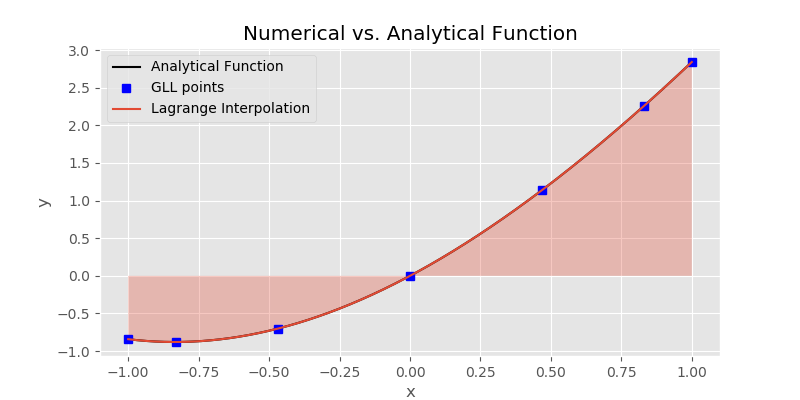

In [2]:
# Exercise for Gauss integration
n = 1000 
x = np.linspace(-1, 1, n)

# MODIFY f and intf to test different functions!
#f = np.sin(x * np.pi) 
f = x + x * x + np.sin(x)

# Analytical value of the DEFINITE integral from -1 to 1
#intf = 1.0 / np.pi * (-np.cos(1.0 * np.pi) + np.cos(-1.0 * np.pi))
intf = 2./3.

# Choose order
N = 6

# Get integration points and weights from the gll routine
xi, w = gll(N)

# Initialize function at points xi
fi = np.interp(xi, x, f)

################################################
# Evaluate integral
intfn = 0
for i in range(len(w)):
    intfn = intfn + w[i] * fi[i]
################################################    


# Calculate Lagrange Interpolant for plotting purposes.
lp = np.zeros((N + 1, len(x)))
for i in range(0, len(x)):
    for j in range(-1, N):
        lp[j + 1, i] = lagrange2(N, j, x[i], xi)
s = np.zeros_like(x)
for j in range(0, N + 1):   
    s = s + lp[j, :] * fi[j]
    
print('Solution of the analytical integral: %g' % intf)
print('Solution of the numerical integral: %g' % intfn)

# To avoid testing (with py.test nbval ...) the plotting section 
# NBVAL_IGNORE_OUTPUT
# -------------------
# Plot results
plt.figure(figsize=(8, 4))
plt.plot(x, f, 'k-', label='Analytical Function')

plt.plot(xi, fi, 'bs', label='GLL points')
plt.plot(x, s, label='Lagrange Interpolation')
plt.fill_between(x, s, np.zeros_like(x), alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical vs. Analytical Function')

plt.legend()
plt.show()